<a href="https://colab.research.google.com/github/ovapichi/pose/blob/main/mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q mediapipe

!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 7.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [2]:
point_names = [
      "nose",
      "left eye (inner)",
      "left eye",
      "left eye (outer)",
      "right eye (inner)",
      "right eye",
      "right eye (outer)",
      "left ear",
      "right ear",
      "mouth (left)",
      "mouth (right)",
      "left shoulder",
      "right shoulder",
      "left elbow",
      "right elbow",
      "left wrist",
      "right wrist",
      "left pinky",
      "right pinky",
      "left index",
      "right index",
      "left thumb",
      "right thumb",
      "left hip",
      "right hip",
      "left knee",
      "right knee",
      "left ankle",
      "right ankle",
      "left heel",
      "right heel",
      "left foot index",
      "right foot index"
  ]


In [5]:
direccion_imagen='/content/salto horizontal sb 2-1.23.jpg'

In [3]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import cv2

def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    #print(pose_landmarks_list)
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

# Nombres de los puntos corporales
def extraer_imagen(resultados):

  # Diccionario para almacenar las coordenadas x y z de cada punto corporal
    coords_dict = {}

  # Iterar sobre los puntos de referencia corporales en la única sublista
    for i, landmark in enumerate(resultados[0]):
        x = landmark.x
        y = landmark.y
        z = landmark.z
        vis=landmark.visibility
        pre=landmark.presence
        #print(landmark)
        # Agregar las coordenadas x y z al diccionario con el nombre del punto como clave
        #coords_dict[point_names[i]] = (x,y,z)
        # Agregar las coordenadas x, y, z al diccionario con el nombre del punto como clave
        coords_dict.update ({point_names[i]+"_x":x,point_names[i]+"_y":y,point_names[i]+"_z":z,point_names[i]+"_vis":vis,point_names[i]+"_pre":pre})



    return coords_dict

#Guarda los frames de un video en archivos .jpg
def guardarFrames(direccion):
  capture = cv2.VideoCapture(direccion)
  cont = 0
  path = '/content/'

  while (capture.isOpened()):
      ret, frame = capture.read()

      if (ret == True):

          cv2.imwrite(path + 'IMG_%04d.jpg' % cont, frame)
          cont += 1
          if (cv2.waitKey(1) == ord('s')):
              break
      else:
          break

  capture.release()
  cv2.destroyAllWindows()
  pass

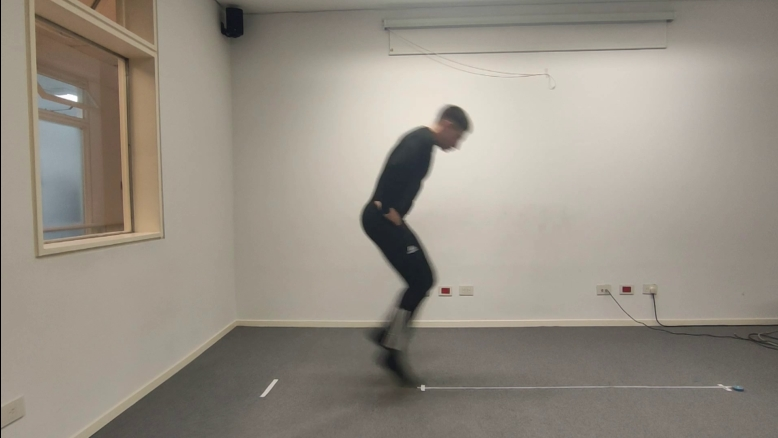

In [6]:

#prueba de las imágenes

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(direccion_imagen)
cv2_imshow(img)

# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)


[[NormalizedLandmark(x=0.586858332157135, y=0.3260559141635895, z=-0.021798251196742058, visibility=0.9997014403343201, presence=0.9999680519104004), NormalizedLandmark(x=0.5897377133369446, y=0.3122067451477051, z=-0.009656916372478008, visibility=0.9995549321174622, presence=0.9999560117721558), NormalizedLandmark(x=0.5894791483879089, y=0.31073513627052307, z=-0.009790744632482529, visibility=0.9994897842407227, presence=0.999962329864502), NormalizedLandmark(x=0.5892434120178223, y=0.30919551849365234, z=-0.009773804806172848, visibility=0.9996067881584167, presence=0.9999574422836304), NormalizedLandmark(x=0.589087963104248, y=0.3114953637123108, z=-0.04315542057156563, visibility=0.9997696280479431, presence=0.9999524354934692), NormalizedLandmark(x=0.5883551836013794, y=0.30960386991500854, z=-0.04333276301622391, visibility=0.9998311996459961, presence=0.999966025352478), NormalizedLandmark(x=0.5876332521438599, y=0.3076249361038208, z=-0.043422527611255646, visibility=0.999871

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


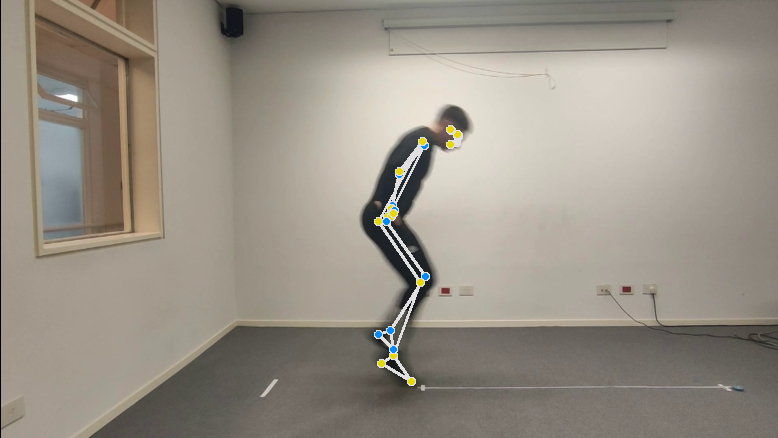

In [7]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

#vision.RunningMode.VIDEO

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.

image = mp.Image.create_from_file(direccion_imagen)

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image= draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

#Visualize the pose segmentation mask.

segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
#print(segmentation_mask)
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
#cv2_imshow(visualized_mask)

In [78]:
print(detection_result.pose_landmarks)
print(detection_result)

diccionario=extraer_imagen(detection_result.pose_landmarks)
#print(diccionario)



AttributeError: 'list' object has no attribute 'NormalizedLandmarkList'

In [82]:
#elegir el numero del punto que quiero obtener datos 0 - nose
'''1 - left eye (inner)
2 - left eye
3 - left eye (outer)
4 - right eye (inner)
5 - right eye
6 - right eye (outer)
7 - left ear
8 - right ear
9 - mouth (left)
10 - mouth (right)
11 - left shoulder
12 - right shoulder
13 - left elbow
14 - right elbow
15 - left wrist
16 - right wrist
17 - left pinky
18 - right pinky
19 - left index
20 - right index
21 - left thumb
22 - right thumb
23 - left hip
24 - right hip
25 - left knee
26 - right knee
27 - left ankle
28 - right ankle
29 - left heel
30 - right heel
31 - left foot index
32 - right foot index'''
punto1=[]
punto2=[]
punto3=[]
talones=[]

def extraer_frame(resultados):
  talones.append([resultados.landmark[30].x,resultados.landmark[30].y])
  pass
def extraer_angulo(resultados):
  punto1.append([resultados.landmark[11].x,resultados.landmark[11].y])
  punto2.append([resultados.landmark[13].x,resultados.landmark[13].y])
  punto3.append([resultados.landmark[15].x,resultados.landmark[15].y])
  pass

In [85]:

video_path="/content/Flexion codo derecho.mp4"

#guarda en un archivo mp4 el resultado para chequear

import cv2
import mediapipe as mp
import numpy as np
import sys



mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

cap = cv2.VideoCapture(video_path)

if cap.isOpened() == False:
    print("Error opening video stream or file")
    raise TypeError

# Obtener las dimensiones del video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Crear un VideoWriter para escribir el video procesado

#out = cv2.VideoWriter('video testigo.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

while cap.isOpened():
    ret, image = cap.read()
    if not ret:
        break


    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    image.flags.writeable = False

    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    results = pose.process(image)

    #ver frames sin anotaciones
    #cv2_imshow(image)

    #dibuja sobre la imagen
   # mp_drawing.draw_landmarks(
   #     image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    #graba el frame en el video output
    #out.write(image)

    #ver frames con anotaciones
    #cv2_imshow(image)

    extraer_angulo(results.pose_landmarks)

pose.close()
cap.release()
#out.release()


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [68]:
print(talones)


[[0.2904168963432312, 0.8796234130859375], [0.2896280288696289, 0.8838916420936584], [0.2885826528072357, 0.8856119513511658], [0.288388729095459, 0.8855541348457336], [0.28852975368499756, 0.8845186829566956], [0.2886059880256653, 0.8843947052955627], [0.2891334593296051, 0.8841484189033508], [0.2893505394458771, 0.884124219417572], [0.28851985931396484, 0.8845571279525757], [0.28790977597236633, 0.8849797248840332], [0.2876158356666565, 0.8848205804824829], [0.28771674633026123, 0.8829078078269958], [0.2877724766731262, 0.8820171356201172], [0.2877843976020813, 0.8818484544754028], [0.287819504737854, 0.8783634901046753], [0.28728631138801575, 0.8787885308265686], [0.2870739996433258, 0.8774223327636719], [0.2872019112110138, 0.877591609954834], [0.28711727261543274, 0.8778539896011353], [0.2868504226207733, 0.87796550989151], [0.28665295243263245, 0.8781242370605469], [0.2866520285606384, 0.8778252601623535], [0.2865966558456421, 0.877622127532959], [0.28661462664604187, 0.877498090

In [63]:
#30 y 31 son ambos talones ejemplo
#para obtener los valores de x del punto 0
results.pose_landmarks.landmark[0].x


0.7844802737236023

In [ ]:
#graficar los puntos obtenidos
import matplotlib.pyplot as plt

# Lista de coordenadas x e y
coordenadas = talones

# Crear listas separadas para coordenadas x e y
coordenadas_x = [coord[0] for coord in coordenadas]
#coordenadas_y = [coord[1] for coord in coordenadas]

# Calcular el tiempo correspondiente a cada frame
tiempo_por_frame = 1 / 60  # 30/60/120/240 fps
tiempo = [i * tiempo_por_frame for i in range(len(coordenadas))]

# Graficar posición del talón derecho en función del tiempo
#plt.plot(tiempo, coordenadas_x, label='Posición X del talón derecho', color='blue')
plt.plot(tiempo, coordenadas_y, label='Posición Y del talón derecho', color='red')

# Etiquetas de los ejes y título
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Posición')
plt.title('Posición del talón derecho en función del tiempo')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


In [81]:
import math

# Función para calcular el ángulo entre tres puntos
def calcular_angulo(p1, p2, p3):
    # Calcular los vectores entre los puntos
    v1 = (p1[0] - p2[0], p1[1] - p2[1])
    v2 = (p3[0] - p2[0], p3[1] - p2[1])

    # Calcular los ángulos de los vectores respecto al eje x
    angulo1 = math.atan2(v1[1], v1[0])
    angulo2 = math.atan2(v2[1], v2[0])

    # Calcular la diferencia de ángulos
    angulo = angulo2 - angulo1

    # Convertir el ángulo a grados
    angulo_grados = math.degrees(angulo)

    # Asegurarse de que el ángulo esté en el rango [0, 360)
    angulo_grados = angulo_grados % 360

    return angulo_grados
# Ejemplo de uso con tres puntos
'''punto1 = (1, 1)
punto2 = (2, 2)
punto3 = (3, 1)'''



Ángulo formado por los puntos: 90.0


In [87]:
print(punto1[0])

[0.5411157608032227, 0.471874475479126]


In [ ]:
lista_angulos=[]
largo=len(punto1)

for i in range(largo):
  angulo = calcular_angulo(punto3[i], punto2[i], punto1[i])
  #print("Ángulo formado por los puntos:", angulo)
  lista_angulos.append(angulo)

lista_angulos

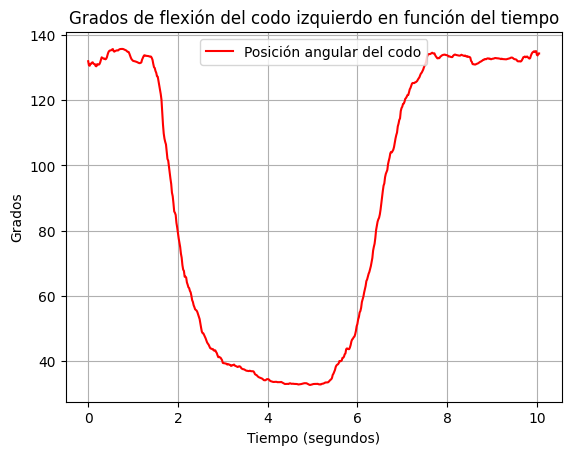

In [100]:
#graficar los puntos obtenidos
import matplotlib.pyplot as plt

# Lista de coordenadas x e y
coordenadas = lista_angulos

# Crear listas separadas para coordenadas x e y
#coordenadas_x = [coord[0] for coord in coordenadas]
#coordenadas_y = [coord[1] for coord in coordenadas]

# Calcular el tiempo correspondiente a cada frame
tiempo_por_frame = 1 / 60  # 30/60/120/240 fps
tiempo = [i * tiempo_por_frame for i in range(len(coordenadas))]

# Graficar posición del talón derecho en función del tiempo
#plt.plot(tiempo, coordenadas_x, label='Posición X del talón derecho', color='blue')
plt.plot(tiempo, coordenadas, label='Posición angular del codo', color='red')

# Etiquetas de los ejes y título
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Grados')
plt.title('Grados de flexión del codo izquierdo en función del tiempo')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()
